In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset=pd.read_csv('evdataset.csv')
# x=dataset.iloc[:,:].values
# y=dataset.iloc[:,:].values


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(dataset["Make"])
dataset.drop("Make",axis=1,inplace=True)
dataset["Make"]=label
label2=le.fit_transform(dataset["Drive"])
dataset.drop("Drive",axis=1,inplace=True)
dataset["Drive"]=label2
#dataset

x=dataset.drop(['link','Electric Range'],axis=1).values
y=dataset['Electric Range'].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))
print(y_pred)

[381.89108209 355.21906724 296.85471535 265.45935068 350.82500714
 335.90858934 478.31832003 485.78593759 426.04198193 400.08744056
 277.56105095 259.76196106 285.01714918 425.50164647 337.80871937
 178.2307921  180.75905559 307.90817428 435.29015684 234.97297856
 439.90353356 640.07232677 458.71415466 526.44415529 394.73829546
 265.54941225 611.70200794 178.65230096 406.76492309 292.50911877
 247.98257855 372.72543262 385.35046659 451.59205784 451.2491146
 265.50410757 285.27008634 265.34959448 386.00651288 454.16229144
 260.16359524 435.63267846 401.03443322 483.59564868 402.42332103
 259.96055122 485.28942651 176.25344356 513.95246159]


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9998069884260569


In [ ]:
# ds=pd.DataFrame({"x":y_test,"y":y_pred})
# ds.plot("x","y",color="r")
# plt.show()
#plt.scatter(y_test,y_pred,c='orange')

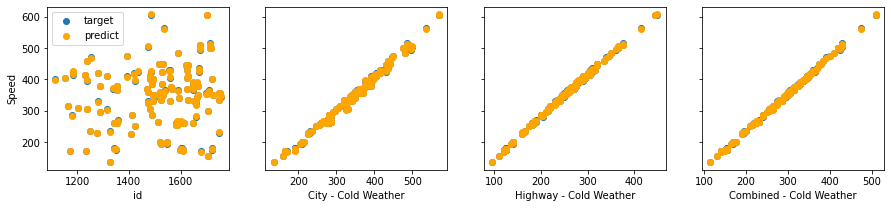

In [ ]:
x_features=['id','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','Acceleration','Top Speed','Total Power','Total Torque','Electric Range']
fig,ax=plt.subplots(1,4,figsize=(15,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],ml.predict(x_train),c='orange', label = 'predict')
ax[0].set_ylabel("Speed"); ax[0].legend();
#fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

